✅ Resultados por fold:
   fold       auc  omission_rate
0     1  0.125000            0.0
1     2  0.500000            0.0
2     3  0.666667            0.0
3     4  0.800000            0.0
4     5  0.375000            0.0

📊 Resumen estadístico:
           fold       auc  omission_rate
count  5.000000  5.000000            5.0
mean   3.000000  0.493333            0.0
std    1.581139  0.261632            0.0
min    1.000000  0.125000            0.0
25%    2.000000  0.375000            0.0
50%    3.000000  0.500000            0.0
75%    4.000000  0.666667            0.0
max    5.000000  0.800000            0.0


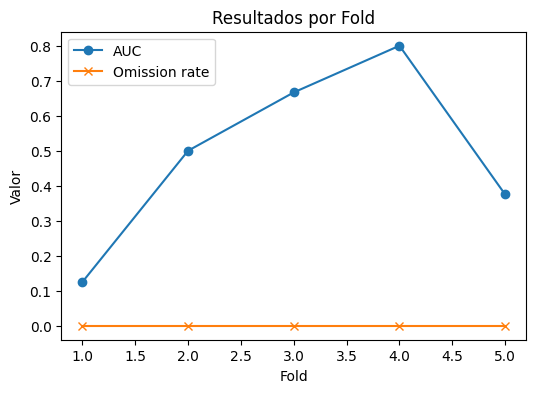

In [1]:
# =========================================
# Ejemplo de uso de PyENMeval
# =========================================

# 1️⃣ Importar librerías necesarias
import numpy as np
import pandas as pd
from pyenmeval.enmevaluate import ENMevaluate

# Si aún no definiste estas funciones en metrics.py, podemos definir versiones de prueba:
def auc(y_true, y_pred):
    # Dummy AUC: solo para ejemplo
    return np.mean(y_pred)

def omission_rate(y_true, y_pred, threshold=0.5):
    # Dummy omission rate
    return np.mean((y_pred < threshold) & (y_true == 1))

# 2️⃣ Generar datos ficticios
np.random.seed(42)

# Datos de presencia (occ_df)
n_occ = 10
occ_df = pd.DataFrame({
    'x': np.random.uniform(0, 10, n_occ),
    'y': np.random.uniform(0, 10, n_occ)
})

# Valores ambientales para cada punto de presencia (3 variables)
env_values = np.random.rand(n_occ, 3)

# Datos de fondo (background points)
n_bg = 20
bg_df = np.random.rand(n_bg, 3)  # 3 variables, igual que env_values

# 3️⃣ Instanciar el evaluador
enmeval = ENMevaluate(
    occ_df=occ_df,
    env_values=env_values,
    bg_df=bg_df,
    k=5  # número de folds
)

# 4️⃣ Ejecutar validación cruzada
results = enmeval.run_kfold()
print("✅ Resultados por fold:")
print(results)

# 5️⃣ Resumen de métricas
summary_df = enmeval.summary()
print("\n📊 Resumen estadístico:")
print(summary_df)

# 6️⃣ Opcional: visualizar resultados con gráfico simple
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(results['fold'], results['auc'], marker='o', label='AUC')
plt.plot(results['fold'], results['omission_rate'], marker='x', label='Omission rate')
plt.xlabel('Fold')
plt.ylabel('Valor')
plt.title('Resultados por Fold')
plt.legend()
plt.show()
